In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [51]:
crime_df = pd.read_csv("crime.csv", encoding="latin-1")
offense_df = pd.read_csv("offense_codes.csv", encoding="latin-1")

In [52]:
crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [53]:
offense_df.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [54]:
print(crime_df.iloc[5],"\n############") 
print(offense_df.head(),"\n###########")
print(crime_df.isnull().sum())     # it's showing nan values 

INCIDENT_NUMBER                                        I182070936
OFFENSE_CODE                                                 3820
OFFENSE_CODE_GROUP                Motor Vehicle Accident Response
OFFENSE_DESCRIPTION    M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
DISTRICT                                                      C11
REPORTING_AREA                                                398
SHOOTING                                                      NaN
OCCURRED_ON_DATE                              2018-09-03 21:09:00
YEAR                                                         2018
MONTH                                                           9
DAY_OF_WEEK                                                Monday
HOUR                                                           21
UCR_PART                                               Part Three
STREET                                                 TALBOT AVE
Lat                                                       42.2902
Long      

## DATA CLEANING

In [55]:
crime_df = crime_df.drop(columns='SHOOTING')
crime_df = crime_df.dropna(axis=0)
print(crime_df.isnull().sum(),"\nShape:",crime_df.shape)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64 
Shape: (296573, 16)


## CRIME COUNT FOR EVERYDAY AND EVERY HOUR

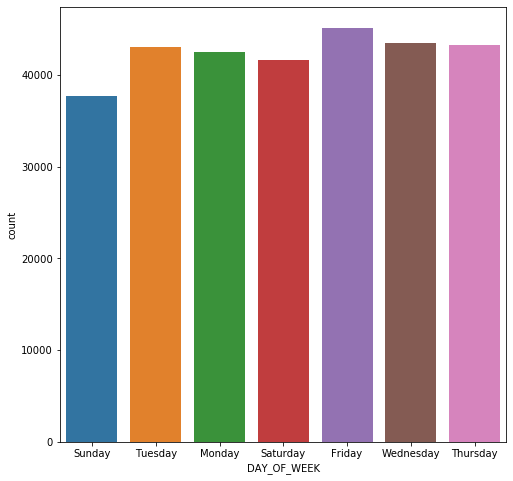

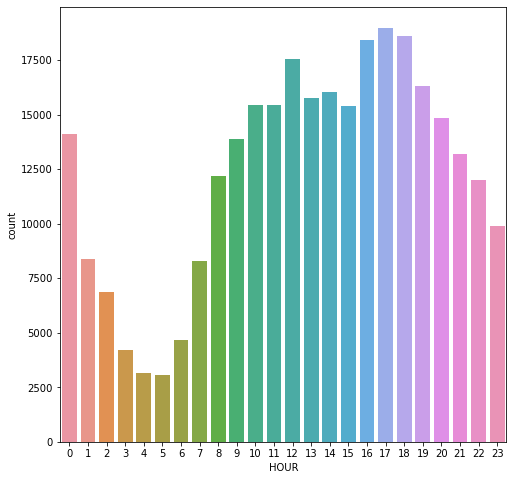

In [56]:
plt.figure(figsize=(8,8))    #We are giving the size of figure
sns.countplot(x=crime_df.DAY_OF_WEEK)  #countplot taking counts of the columns which you choose 
plt.show() 

plt.figure(figsize=(8,8))    
sns.countplot(x=crime_df.HOUR)  
plt.show() 

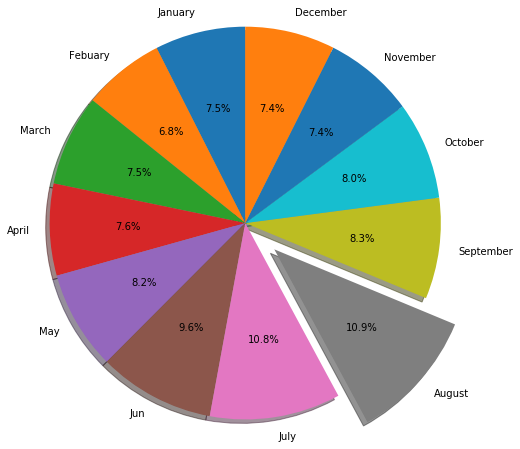

In [57]:
plt.figure(figsize=(8,8))    #first size of figure

#giving the name of piecies
labels = 'January', 'Febuary', 'March', 'April', 'May', 'Jun', 'July', 'August', 'September', 'October', 'November', 'December'
sizes_month = []    
for i in range(12):
    i+=1
    sizes_month.append(len(crime_df[crime_df['MONTH']==i]))#count of crime for every month
    

explode = (0, 0,0,0,0,0,0,0.2,0,0,0,0)  #In here we are choosing one piece of pie it's going out from the middle
                               
plt.pie(sizes_month, explode = explode, labels=labels,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

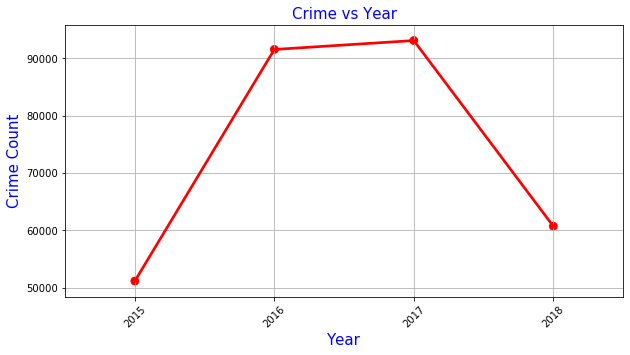

In [58]:
year_count = []

for i in crime_df.YEAR.unique():
    year_count.append(len(crime_df[crime_df['YEAR']==i]))

plt.figure(figsize=(10,5))
sns.pointplot(x=crime_df.YEAR.unique(),y=year_count,color='red',alpha=0.8)
plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Crime Count',fontsize = 15,color='blue')
plt.title('Crime vs Year',fontsize = 15,color='blue')
plt.grid()
plt.show()

## LARCENY VISULAIZATION ON HEAT MAP USING FOLIUM

In [59]:
import folium
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[42.361145,-71.057083],
                    zoom_start = 12, min_zoom=12) #Giving the location just write boston coordinat to google

heat_df = crime_df[crime_df['YEAR']==2017] # I take 2017 cause there is more crime against to other years
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Larceny'] 
heat_df = heat_df[['Lat', 'Long']] #giving only latitude and longitude now in heat_df just latitude and longitude
                                        #from 2017 larceny responde

folium.CircleMarker([42.356145,-71.064083],
                    radius=50,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray) #Adding mark on the map but it's hard to find correct place. 
                                         #it's take to muhc time
    
    
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
#We have to give latitude and longitude like this [[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]

HeatMap(heat_data, radius=10).add_to(map_hooray) #Adding map_hooray to HeatMap
map_hooray #Plotting

## MOTORVEHICLE ACCIDENTS

In [60]:
map_hooray = folium.Map(location=[42.361145,-71.057083],
                    zoom_start = 12, min_zoom=12) 

heat_df = crime_df[crime_df['YEAR']==2017]
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']
heat_df = heat_df[['Lat', 'Long']]


heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

## DRUGS

In [61]:
map_hooray = folium.Map(location=[42.340145,-71.057083],
                    zoom_start = 13, min_zoom=13) 

heat_df = crime_df[crime_df['YEAR']==2017] 
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Drug Violation']
heat_df = heat_df[['Lat', 'Long']]


heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

## PROSTITUTION

In [62]:
map_hooray = folium.Map(location=[42.351145,-71.057083],
                    zoom_start = 12, min_zoom=12) 

heat_df = crime_df[crime_df['YEAR']==2017] 
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Prostitution']
heat_df = heat_df[['Lat', 'Long']]

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

## HOMICIDE

In [63]:
map_hooray = folium.Map(location=[42.341145,-71.057083],
                    zoom_start = 12, min_zoom = 12) 


heat_df = crime_df[crime_df['YEAR']==2017]
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Homicide']
heat_df = heat_df[['Lat', 'Long']]

folium.CircleMarker([42.313145,-71.078083],
                    radius=80,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray) #Adding mark on the map but it's hard to find correct place. 
                                         #it's take to muhc time

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(map_hooray)
map_hooray

## PREDICTING THE CRIME CODE USING KNNA ND LOGISTIC REGRESSION

In [64]:
df=crime_df

In [65]:
df.drop(['DISTRICT', 'UCR_PART', 'STREET', 'Lat', 'Long'], axis=1, inplace=True)
sorted(df['REPORTING_AREA'].unique())[:10]
## replace empty reporting areas with '-1'
df['REPORTING_AREA'] = df['REPORTING_AREA'].str.replace(' ', '-1')
sorted(df['REPORTING_AREA'].unique())
df['REPORTING_AREA'] = df['REPORTING_AREA'].astype(int)

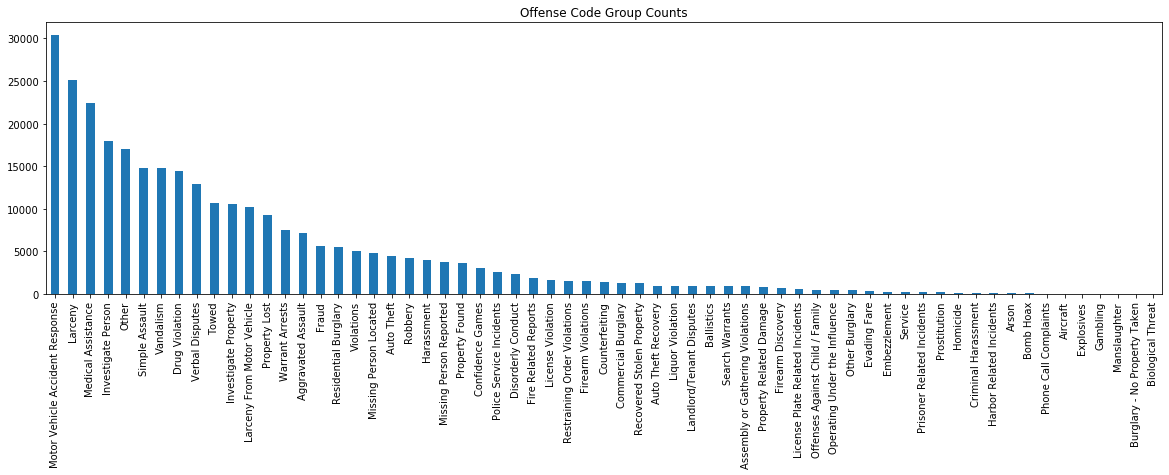

In [66]:
# code day of week to ints
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['DAY_OF_WEEK'] = df['OCCURRED_ON_DATE'].dt.dayofweek
df['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(20,5), title='Offense Code Group Counts')

In [67]:
df_new = df.copy(deep=True)
df_new['MV'] = np.where(df_new['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response', 1, 0)

In [68]:
df_mv = df_new[['MV', 'REPORTING_AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']]
df_mv.head()


,MV,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,0,808,2018,9,6,13
1,0,347,2018,8,1,0
2,0,151,2018,9,0,19
3,0,272,2018,9,0,21
4,0,421,2018,9,0,21
